In [1]:
import math
import pandas_datareader as web
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = web.DataReader('AAPL', data_source='yahoo',start='2010-01-01',end='2022-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439792
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [3]:
df.shape

(3022, 6)

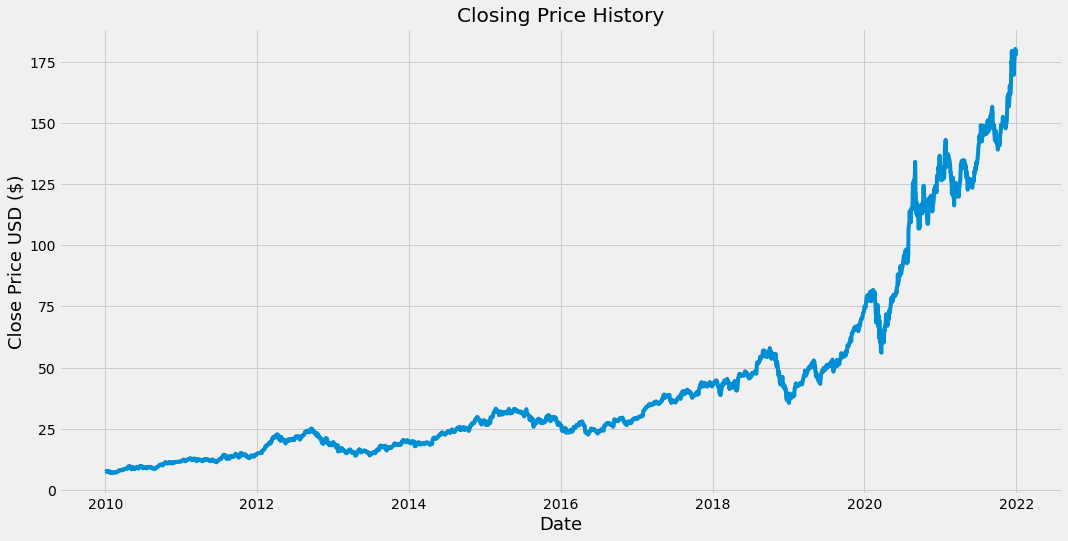

In [4]:
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2418

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00384584],
       [0.00452113],
       [0.00459731],
       ...,
       [0.9945236 ],
       [0.98772127],
       [0.9840896 ]])

In [9]:
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)

[array([3.84583956e-03, 4.52112883e-03, 4.59730631e-03, 3.89525473e-03,
       3.81495680e-03, 4.10319040e-03, 3.71819907e-03, 3.22613926e-03,
       3.82936876e-03, 3.57819722e-03, 2.85761599e-03, 4.73318495e-03,
       4.05172463e-03, 3.29819628e-03, 1.17351464e-03, 2.26879845e-03,
       2.85967484e-03, 3.25908362e-03, 1.49056939e-03, 2.05610186e-06,
       5.51755483e-04, 7.84400109e-04, 1.47821629e-03, 0.00000000e+00,
       7.02046083e-04, 4.26168341e-04, 8.52342181e-04, 6.32047909e-04,
       1.36292340e-03, 1.71498136e-03, 2.33674052e-03, 2.16174371e-03,
       2.23997454e-03, 1.98056485e-03, 1.72321402e-03, 1.03145669e-03,
       1.77262918e-03, 2.04850692e-03, 2.58791205e-03, 3.48761329e-03,
       3.45878938e-03, 3.55760597e-03, 3.84172186e-03, 5.53817907e-03,
       5.56494413e-03, 6.37611204e-03, 6.75081187e-03, 6.88669051e-03,
       7.11316408e-03, 6.54493505e-03, 6.67051944e-03, 6.60258012e-03,
       6.71169645e-03, 6.21758329e-03, 6.73228496e-03, 7.47551080e-03,
     

In [10]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [12]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2358, 60, 1)

In [13]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

2358/2358 [==============================] - 66s 26ms/step - loss: 1.6770e-04


In [27]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [28]:
x_test = np.array(x_test)

In [29]:
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [30]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [31]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

9.39250779941382

C:\Users\mehak\AppData\Local\Temp/ipykernel_13220/2709988361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


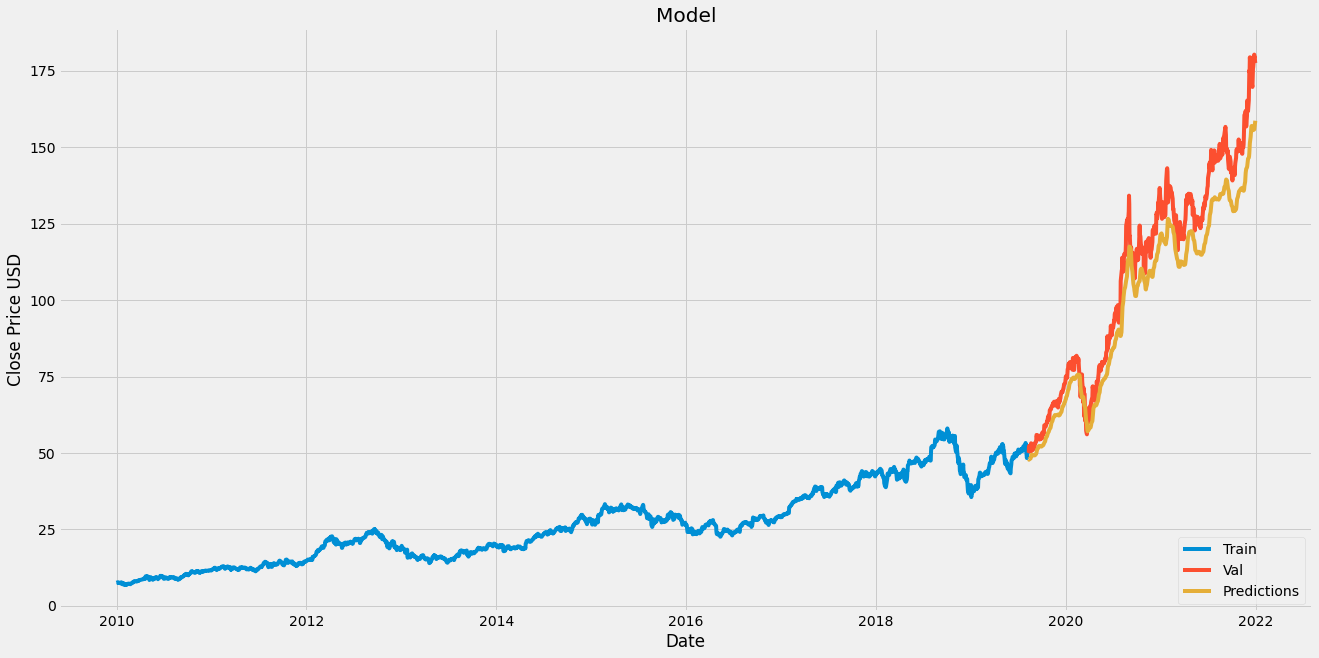

In [34]:
train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [35]:
valid

,Close,Predictions
Date,,
2019-08-12,50.119999,47.897530
2019-08-13,52.242500,47.785282
2019-08-14,50.687500,47.916958
2019-08-15,50.435001,48.006588
2019-08-16,51.625000,48.043388
...,...,...
2021-12-27,180.330002,155.873169
2021-12-28,179.289993,156.651474
2021-12-29,179.380005,157.454361


In [36]:
apple_quote = web.DataReader('AAPL',data_source='yahoo',start='2010-01-01',end='2022-01-01')

In [38]:
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test= np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[158.94691]]


In [40]:
apple_quote2 = web.DataReader('AAPL',data_source='yahoo',start='2022-01-01',end='2022-01-01')
print(apple_quote2['Close'])

Date
2021-12-31    177.570007
Name: Close, dtype: float64
